# Imports:

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence,Callable
from math import erf,pi,sqrt

# Q7.1:

# Methods:

In [46]:
def f(x: np.ndarray) -> np.ndarray:
    """
    the function we are trying to integrate

    :rtype: np.ndarray
    """
    return np.exp(-x**2)

In [47]:
def g(x: np.ndarray) -> np.ndarray:
    """
    the helping function in intelligent sampling

    :param x: the input of function
    :type x: np.ndarray
    :return: the result of the function
    :rtype: np.ndarray
    """
    return np.exp(-x)

In [54]:
def getExpMinusXDistributedNumbers(n: int, a: float, b: float) -> np.ndarray:
    """
    the function to create random numbers to fit the distribution exp(-x) from a to b

    :param n: the count of numbers
    :type n: int
    :param a: the min of generated numbers
    :type a: float
    :param b: the max of generated numbers
    :type b: float
    :return: the generated numbers
    :rtype: np.ndarray
    """
    xs = np.random.uniform(0,1,n)
    return -np.log(np.exp(-a) -xs*(np.exp(-a)-np.exp(-b)))

In [55]:
def simpleSamplingIntegration(function: Callable, limits: Sequence, n: int) -> Sequence:
    """
    the function to integrate the input function with the input limits by simple sampling integrating method
    simple integrating method:
    1- generate n samples of random uniform number from a to b
    2- calculate result of the function for each sample and save into a list
    3- c*average of results is the result of the integration
    4- c*std(results)/sqrt(n) is the predicted error of the integration
    5- c i s the normalization param

    :param function: the function we are trying to integrate
    :type function: Callable
    :param limits: the limits of integration
    :type limits: Sequence
    :param n: the number of samples(the predicted error reduces by increasing n)
    :type n: iny
    :return: the result of integration and predicted error
    :rtype: Sequence
    """
    a,b = limits[0],limits[1]
    c = b -a
    xs = np.random.uniform(a,b,n)
    fs = function(xs)
    return c*np.average(fs),c*np.std(fs)/np.sqrt(n)

In [56]:
def IntelligentSamplingWithExpMinusXDistributedNumberIntegration(function: Callable, limits: Sequence, n: int) -> Sequence:
    """
    the function to integrate a input function with the input limits by intelligent sampling method(ExpMinusXDistributed)
    intelligent sampling method(ExpMinusXDistributed):
    1- generate n samples of random ExpMinusXDistributed numbers
    2- calculate result of the function over expMinus function for each sample and save into a list
    3- c*average of results is the result of the integration
    4- c*std(results)/sqrt(n) is the predicted error of the integration
    5- c i s the normalization param

    :param function: the function we are trying to integrate
    :type function: Callable
    :param limits: the limits of integration
    :type limits: Sequence
    :param n: the number of samples(the predicted error reduces by increasing n)
    :type n: iny
    :return: the result of integration and predicted error
    :rtype: Sequence
    """
    a,b = limits[0],limits[1]
    xs = getExpMinusXDistributedNumbers(n,a,b)
    fOverGs = function(xs)/g(xs)
    c = np.exp(-a) - np.exp(-b)
    return c*np.average(fOverGs),c*np.std(fOverGs)/np.sqrt(n)

# Explanations:

the normalized distribution function is $$\frac{e^{-x}}{1-e^{-2}}\ \textrm{in\ the\ range\ $x \in [0, 2]$\ and $0$ elsewhere}$$

and needs the sampling distribution
    $${ln}(1-[1-e^{-2}]x)$$

#### Showing that the ExpMinusX Distributed Number Generator works

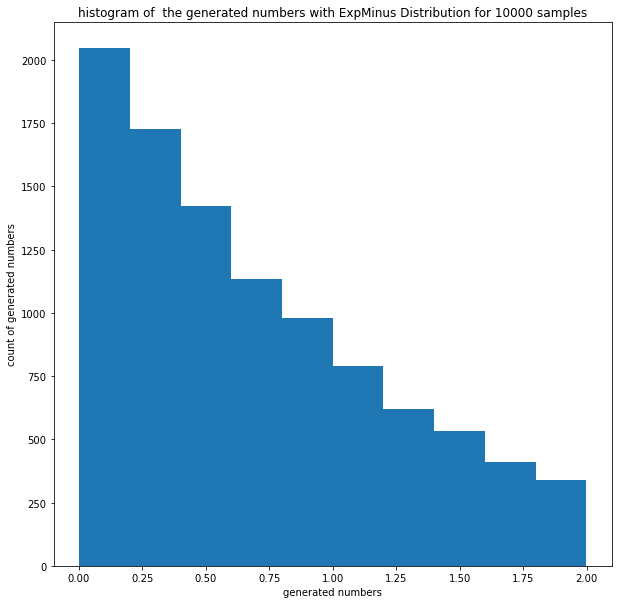

In [60]:
plt.figure(figsize=(10,10))
plt.title("histogram of  the generated numbers with ExpMinus Distribution for 10000 samples")
plt.xlabel("generated numbers")
plt.ylabel("count of generated numbers")
plt.hist(getExpMinusXDistributedNumbers(10000,0,2))
plt.show()

#### getting the real answer of the integration

$\frac{\sqrt{\pi}}{2}erf(2)=\int_0^2 e^{-x^2} d{x}$

In [68]:
realAns = 0.5*sqrt(pi)*erf(2)
print(realAns)

0.8820813907624215


In [73]:
simpleSamplingResults = []
simpleSamplingPredictedErrors = []
for i in range(1,9):
    r,pe = simpleSamplingIntegration(f,(0,2),10**i)
    simpleSamplingResults.append(r)
    simpleSamplingPredictedErrors.append(pe)
    print("result for {} samples is ".format(10**i),r," with predicted error of ",pe)

result for 10 samples is  0.7471380841426754  with predicted error of  0.13444483698946968
result for 100 samples is  0.9330013751005722  with predicted error of  0.06961656741777714
result for 1000 samples is  0.876688819791144  with predicted error of  0.02170534295854232
result for 10000 samples is  0.8748123061893435  with predicted error of  0.006889652181253102
result for 100000 samples is  0.8835952943578028  with predicted error of  0.0021806508303473192
result for 1000000 samples is  0.8820825940586292  with predicted error of  0.0006892856548350282
result for 10000000 samples is  0.8819307437420292  with predicted error of  0.00021799972976925606
result for 100000000 samples is  0.8821327262063328  with predicted error of  6.893087219693625e-05


In [74]:
intelSamplingResults = []
intelSamplingPredictedErrors = []
for i in range(1,9):
    r,pe = IntelligentSamplingWithExpMinusXDistributedNumberIntegration(f,(0,2),10**i)
    intelSamplingResults.append(r)
    intelSamplingPredictedErrors.append(pe)
    print("result for {} samples is ".format(10**i),r," with predicted error of ",pe)

result for 10 samples is  0.82991922285309  with predicted error of  0.10301430538573689
result for 100 samples is  0.8734178507792494  with predicted error of  0.026983166209237262
result for 1000 samples is  0.8784153423763718  with predicted error of  0.008562220075947693
result for 10000 samples is  0.8807732594011027  with predicted error of  0.002677248574390975
result for 100000 samples is  0.8823665282873336  with predicted error of  0.0008407709019103617
result for 1000000 samples is  0.8819086019525304  with predicted error of  0.00026622742768314856
result for 10000000 samples is  0.88212637444574  with predicted error of  8.411717768480515e-05
result for 100000000 samples is  0.8820638317858344  with predicted error of  2.6600100315541924e-05


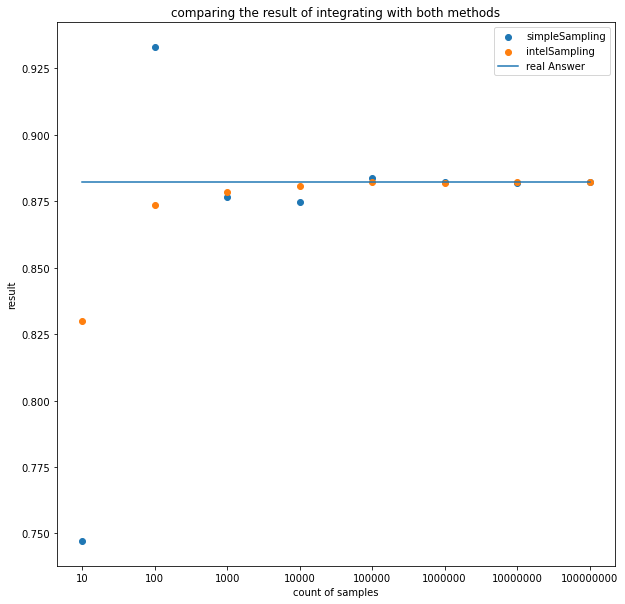

In [88]:
plt.figure(figsize=(10,10))
plt.title("comparing the result of integrating with both methods")
plt.xlabel("count of samples")
plt.ylabel("result")
plt.scatter([i for i in range(1,9)],simpleSamplingResults)
plt.scatter([i for i in range(1,9)],intelSamplingResults)
plt.xticks([i for i in range(1,9)],[10**i for i in range(1,9)])
plt.plot([1,8],[realAns,realAns])
plt.legend(["simpleSampling","intelSampling","real Answer"])
plt.show()

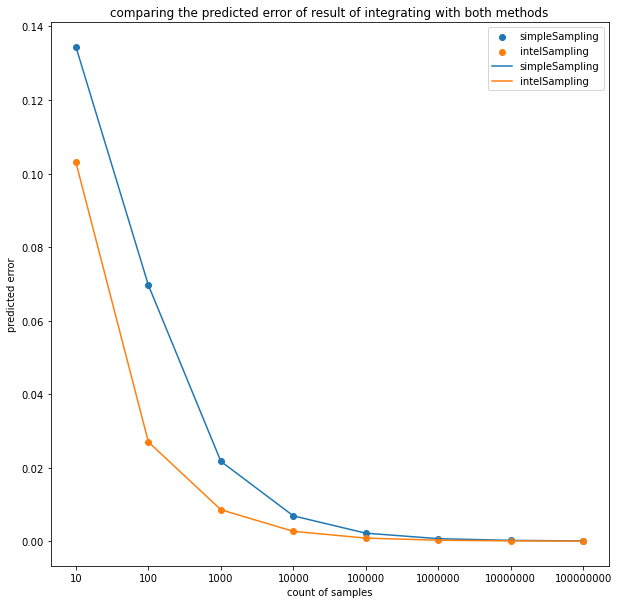

In [91]:
plt.figure(figsize=(10,10))
plt.title("comparing the predicted error of result of integrating with both methods")
plt.xlabel("count of samples")
plt.ylabel("predicted error")
plt.scatter([i for i in range(1,9)],simpleSamplingPredictedErrors)
plt.scatter([i for i in range(1,9)],intelSamplingPredictedErrors)
plt.plot([i for i in range(1,9)],simpleSamplingPredictedErrors)
plt.plot([i for i in range(1,9)],intelSamplingPredictedErrors)
plt.xticks([i for i in range(1,9)],[10**i for i in range(1,9)])
plt.legend(["simpleSampling","intelSampling","simpleSampling","intelSampling"])
plt.show()

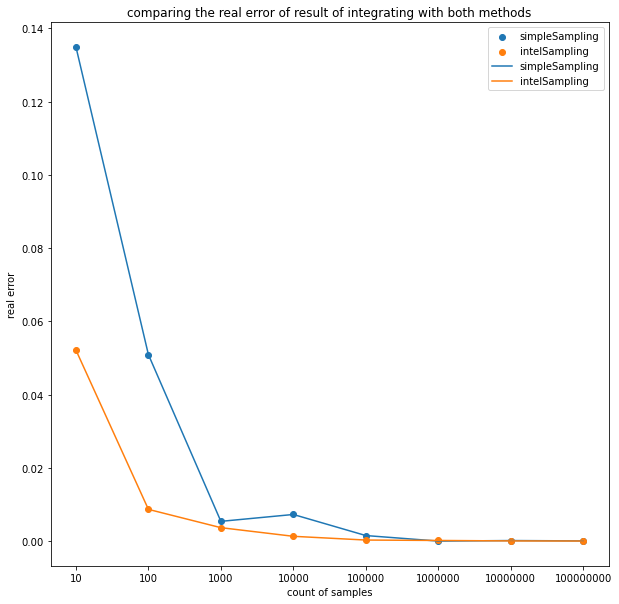

In [93]:
plt.figure(figsize=(10,10))
plt.title("comparing the real error of result of integrating with both methods")
plt.xlabel("count of samples")
plt.ylabel("real error")
plt.scatter([i for i in range(1,9)],np.abs(np.array(simpleSamplingResults)-realAns))
plt.scatter([i for i in range(1,9)],np.abs(np.array(intelSamplingResults)-realAns))
plt.plot([i for i in range(1,9)],np.abs(np.array(simpleSamplingResults)-realAns))
plt.plot([i for i in range(1,9)],np.abs(np.array(intelSamplingResults)-realAns))
plt.xticks([i for i in range(1,9)],[10**i for i in range(1,9)])
plt.legend(["simpleSampling","intelSampling","simpleSampling","intelSampling"])
plt.show()

# Q7.2:

# Methods:

In [97]:
def rmFunction(r: np.ndarray, theta: np.ndarray, phi: np.ndarray) -> np.ndarray:
    """
    the function to integrate rho*(r**3)*np.cos(theta)*np.sin(theta) by

    :param r: the radius in spiral coordination
    :type r: np.ndarray
    :param theta: the first angle in spiral coordination
    :type theta: np.ndarray
    :param phi: the second angle in spiral coordination
    :type phi: np.ndarray
    :return: the result of the function
    :rtype: np.ndarray
    """
    rho = r*np.cos(theta)+3
    return rho*(r**3)*np.cos(theta)*np.sin(theta)
def mFunction(r: np.ndarray, theta: np.ndarray, phi: np.ndarray) -> np.ndarray:
    """
    the function to integrate rho*(r**2)*np.sin(theta) by r theta and phi

    :param r: the radius in spiral coordination
    :type r: np.ndarray
    :param theta: the first angle in spiral coordination
    :type theta: np.ndarray
    :param phi: the second angle in spiral coordination
    :type phi: np.ndarray
    :return: the result of the function
    :rtype: np.ndarray
    """
    rho = r*np.cos(theta)+3
    return rho*(r**2)*np.sin(theta)

In [98]:
def simpleSamplingTripleIntegration(function: Callable, limits1: Sequence, limits2: Sequence, limits3: Sequence, n: int) -> Sequence:
    """
    the function to integrate the input function with the input limits by simple sampling integrating method but in 3 dims
    simple integrating method:
    1- generate n samples of random uniform number in each limit for each param
    2- calculate result of the function for each set of samples and save into a list
    3- c*average of results is the result of the integration
    4- c*std(results)/sqrt(n) is the predicted error of the integration
    5- c i s the normalization param

    :param function: the function we are trying to integrate
    :type function: Callable
    :param limits1:the limits of integration for the 1st param
    :type limits1:Sequence
    :param limits2:the limits of integration for the 2nd param
    :type limits2:Sequence
    :param limits3:the limits of integration for the 3rd param
    :type limits3:Sequence
    :param n: the number of samples(the predicted error reduces by increasing n)
    :type n: iny
    :return: the result of integration and predicted error
    :rtype: Sequence
    """
    xs = np.random.uniform(limits1[0],limits1[1],n)
    ys = np.random.uniform(limits2[0],limits2[1],n)
    zs =  np.random.uniform(limits3[0],limits3[1],n)
    c = (limits3[1]-limits3[0])*(limits2[1]-limits2[0])*(limits1[1]-limits1[0])
    fs = function(xs,ys,zs)
    return c*np.average(fs),c*np.std(fs)/np.sqrt(n)

In [101]:
def getResult(n):
    a = simpleSamplingTripleIntegration(rmFunction,(0,1),(0,np.pi),(0,2*np.pi),n)
    b = simpleSamplingTripleIntegration(mFunction,(0,1),(0,np.pi),(0,2*np.pi),n)
    ra = a[1]/a[0]
    rb = b[1]/b[0]
    return a[0]/b[0] , (a[0]/b[0])*(ra+rb)

# Explanation:

\begin{equation}
        {r}_{cm} = \frac{\int_{\text{sphere}}\rho({r}){r}d{V}}{\int_{\text{sphere}}\rho({r})d{V}}.
    \end{equation}

\begin{gather}
        \rho(z=R) = 2\rho(z=-R) \implies \rho(r=R, \theta=0) = 2\rho(r=R, \theta=\pi) \\
        \rho(r, \theta) = \rho_0 (3 +\frac{r}{R}\cos{\theta}) \implies \\
        z_{cm} = \frac{\int_{\text{sphere}}z\rho d{V}}{\int_{\text{sphere}}\rho d{V}} =
        \frac{\int_0^R\int_0^\pi\int_0^{2\pi} \rho_0 (3+\frac{r}{R}\cos{\theta})r^3\sin{\theta}\cos{\theta}
        d{\varphi} d{\theta} d{r}}{\int_0^R\int_0^\pi\int_0^{2\pi} \rho_0 (3+\frac{r}{R}\cos{\theta})r^2
        \sin{\theta} d{\varphi} d{\theta} d{r}} \\
        z_{cm} = \frac{\int_0^R\int_0^\pi (3+\frac{r}{R}\cos{\theta})r^3\sin{\theta}\cos{\theta}
        d{\theta} d{r}}{\int_0^R\int_0^\pi (3+\frac{r}{R}\cos{\theta})r^2\sin{\theta}
        d{\theta} d{r}}
    \end{gather}

\begin{align}
        z_{cm} &= \frac{R^4 \int_0^\pi (\frac{3}{4}+\frac{\cos{\theta}}{5})\sin{\theta}\cos{\theta} d{\theta}}
        {R^3 \int_0^\pi (1+\frac{\cos{\theta}}{4})\sin{\theta} d{\theta}} \\
        &= \frac{\frac{3}{8}\int_0^\pi\sin(2\theta) d{\theta} + \frac{1}{5}\int_{-1}^{+1}\cos^2{\theta}
        d{(\cos{\theta})}} {\int_0^\pi (\sin{\theta} + \frac{\sin(2\theta)}{2}) d{\theta}}R \\
        &= \frac{-\frac{3}{16} {\cos(2\theta)}_0^\pi + {\frac{x^3}{15}}_{-1}^{+1}}
        {-{\cos{\theta}}_0^\pi - {\frac{\cos(2\theta)}{4}}_0^\pi}
    \end{align}

\begin{empheq}
        z_{cm} = \frac{R}{15}
    \end{empheq}

In [102]:
results = []
predictedErrors = []
realAnswer = 1/15
for i in range(1,9):
    r,pe = getResult(10**i)
    results.append(r)
    predictedErrors.append(pe)
    print("result for {} samples is ".format(10**i),r," with predicted error of ",pe)

result for 10 samples is  -0.08159909317077309  with predicted error of  0.18075084424237955
result for 100 samples is  0.06937598030897618  with predicted error of  0.06083348182097172
result for 1000 samples is  0.06846251798580076  with predicted error of  0.024569852201194176
result for 10000 samples is  0.06307609298309472  with predicted error of  0.006890351822256777
result for 100000 samples is  0.06483963834788373  with predicted error of  0.0022486448257877413
result for 1000000 samples is  0.06659779571274407  with predicted error of  0.0007163742935777968
result for 10000000 samples is  0.06657232019608574  with predicted error of  0.000225989578028224
result for 100000000 samples is  0.0665243311616602  with predicted error of  7.143025617061048e-05


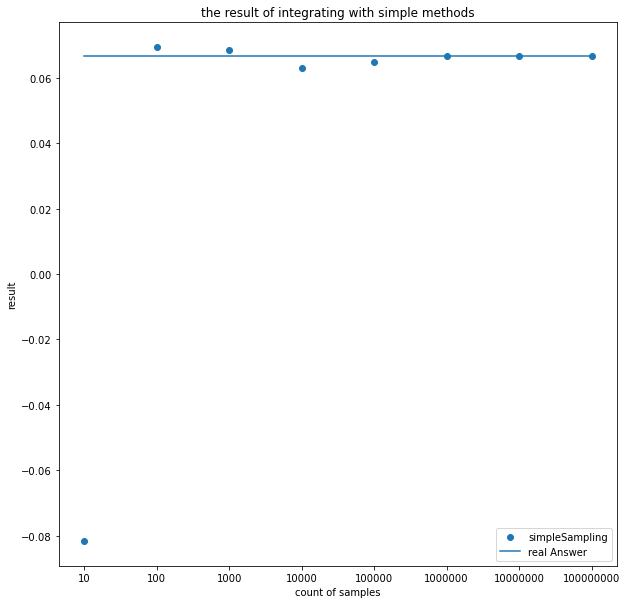

In [105]:
plt.figure(figsize=(10,10))
plt.title("the result of integrating with simple methods")
plt.xlabel("count of samples")
plt.ylabel("result")
plt.scatter([i for i in range(1,9)],results)
plt.xticks([i for i in range(1,9)],[10**i for i in range(1,9)])
plt.plot([1,8],[realAnswer,realAnswer])
plt.legend(["simpleSampling","real Answer"])
plt.show()

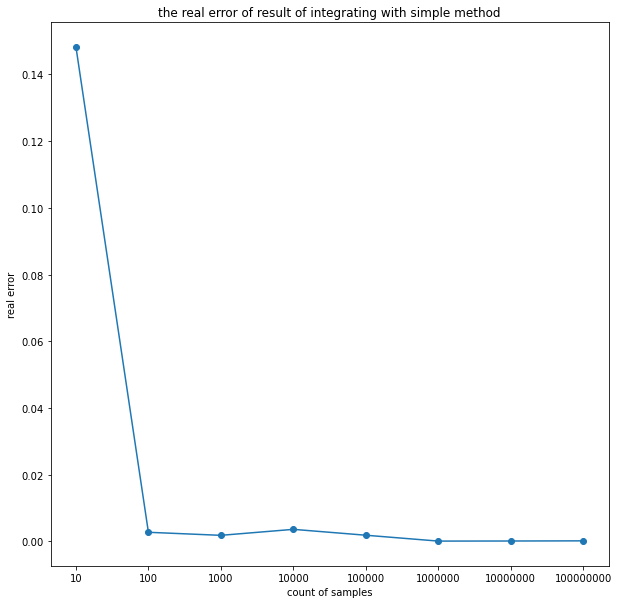

In [106]:
plt.figure(figsize=(10,10))
plt.title("the real error of result of integrating with simple method")
plt.xlabel("count of samples")
plt.ylabel("real error")
plt.scatter([i for i in range(1,9)],np.abs(np.array(results)-realAnswer))
plt.plot([i for i in range(1,9)],np.abs(np.array(results)-realAnswer))
plt.xticks([i for i in range(1,9)],[10**i for i in range(1,9)])
plt.show()